# Imports

In [196]:
import numpy as np
import pandas as pd
import pyshark
import matplotlib.pyplot as plt
import json # original json library
import logging

### Log setup

In [197]:
LOG_FILENAME = '/home/benjamin/Folders_Python/Cyber/logs/logfile.log'
LOG_FORMAT = '%(asctime)% -- %(name)s -- %(levelname)s -- %(message)s'
# LOG_LEVEL = logging.INFO

# specific logger for the module
logger = logging.getLogger(__name__)   # creates specific logger for the module
logger.setLevel(logging.DEBUG)    # entry level of messages from all handlers
LOG_FORMAT = '%(asctime)s -- %(name)s -- %(levelname)s -- %(message)s'
formatter = logging.Formatter(LOG_FORMAT)

# file handler to log everything
file_handler = logging.FileHandler(LOG_FILENAME, mode='w')
file_handler.setLevel(logging.DEBUG)  # all messages (DEBUG and up) get logged in the file
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# stream handler to show messages to the console
console = logging.StreamHandler()
console.setLevel(logging.WARNING)  # Warning messages and up get displayed to the console
console.setFormatter(formatter)
logger.addHandler(console)

# start your engine
logger.info("-------- new run traitement dataframes--------")

### Load dataframe

In [198]:
DIRDATAFRAMES = '/home/benjamin/Folders_Python/Cyber/data/dataframes/'
dfname = 'smallFlows.pcap.pkl'

In [199]:
filename = DIRDATAFRAMES + dfname
df = pd.read_pickle(filename)

In [200]:
df

,ETH_dst,ETH_src,ETH_type,IP_version,IP_hdr_len,IP_len,IP_id,IP_flags,IP_ttl,IP_proto,...,TCP_time_delta,TCP_payload,TIMESTAMP_ts,UDP_srcport,UDP_dstport,UDP_length,UDP_stream,UDP_time_relative,UDP_time_delta,UDP_payload
0,00:1a:8c:15:f9:80,40:61:86:9a:f1:f5,0x00000800,4,20,983,0x000076e0,0x00000040,128,6,...,0.000000000,47:45:54:20:2f:63:6f:6d:70:6c:65:74:65:2f:73:6...,2011-01-25 19:52:22.484409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40:61:86:9a:f1:f5,00:1a:8c:15:f9:80,0x00000800,4,20,426,0x00002d62,0x00000000,52,6,...,0.029841000,48:54:54:50:2f:31:2e:31:20:32:30:30:20:4f:4b:0...,2011-01-25 19:52:22.514250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00:1a:8c:15:f9:80,40:61:86:9a:f1:f5,0x00000800,4,20,52,0x00002e9e,0x00000040,128,6,...,0.000000000,None,2011-01-25 19:52:22.708292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00:1a:8c:15:f9:80,40:61:86:9a:f1:f5,0x00000800,4,20,40,0x000076ef,0x00000040,128,6,...,0.199582000,None,2011-01-25 19:52:22.713832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40:61:86:9a:f1:f5,00:1a:8c:15:f9:80,0x00000800,4,20,52,0x00009415,0x00000000,52,6,...,0.018766000,None,2011-01-25 19:52:22.727058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14256,52:54:00:12:35:02,08:00:27:cc:3f:1b,0x00000800,4,20,40,0x000088b3,0x00000040,128,6,...,61.854118000,None,2011-01-25 19:57:20.768972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14257,ff:ff:ff:ff:ff:ff,40:61:86:9a:f1:f5,0x00000800,4,20,148,0x000035d7,0x00000000,128,17,...,NaN,NaN,2011-01-25 19:57:20.787428,17500,17500,128,134,90.043966000,29.812442000,7b:22:68:6f:73:74:5f:69:6e:74:22:3a:20:32:30:3...
14258,ff:ff:ff:ff:ff:ff,40:61:86:9a:f1:f5,0x00000800,4,20,148,0x000035d8,0x00000000,128,17,...,NaN,NaN,2011-01-25 19:57:20.789753,17500,17500,128,135,90.043783000,29.813261000,7b:22:68:6f:73:74:5f:69:6e:74:22:3a:20:32:30:3...
14259,ff:ff:ff:ff:ff:ff,40:61:86:9a:f1:f5,0x00000800,4,20,148,0x000035d7,0x00000000,128,17,...,NaN,NaN,2011-01-25 19:57:20.987428,17500,17500,128,134,90.243966000,0.200000000,7b:22:68:6f:73:74:5f:69:6e:74:22:3a:20:32:30:3...


In [201]:
df.describe(include='all').transpose()

/tmp/ipykernel_4181/4214053870.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').transpose()


,count,unique,top,freq,first,last
ETH_dst,14261,12,40:61:86:9a:f1:f5,6184,NaT,NaT
ETH_src,14261,8,00:1a:8c:15:f9:80,6170,NaT,NaT
ETH_type,14261,2,0x00000800,14243,NaT,NaT
IP_version,14243,1,4,14243,NaT,NaT
IP_hdr_len,14243,1,20,14243,NaT,NaT
IP_len,14243,858,40,5319,NaT,NaT
IP_id,14243,11304,0x00000000,79,NaT,NaT
IP_flags,14243,2,0x00000040,12312,NaT,NaT
IP_ttl,14243,40,128,5979,NaT,NaT
IP_proto,14243,3,6,13708,NaT,NaT


In [202]:
df.columns

Index(['ETH_dst', 'ETH_src', 'ETH_type', 'IP_version', 'IP_hdr_len', 'IP_len',
       'IP_id', 'IP_flags', 'IP_ttl', 'IP_proto', 'IP_src', 'IP_dst',
       'TCP_srcport', 'TCP_dstport', 'TCP_stream', 'TCP_len', 'TCP_seq',
       'TCP_ack', 'TCP_hdr_len', 'TCP_flags', 'TCP_time_relative',
       'TCP_time_delta', 'TCP_payload', 'TIMESTAMP_ts', 'UDP_srcport',
       'UDP_dstport', 'UDP_length', 'UDP_stream', 'UDP_time_relative',
       'UDP_time_delta', 'UDP_payload'],
      dtype='object')

### Features recast sur dataframe

In [203]:
# transforms variables into right type

columns_to_encode_as_ordinal = ['ETH_dst', 'ETH_src', 'ETH_type', 'IP_id', 'IP_flags', 'IP_src', 'IP_dst', 'TCP_flags']

columns_to_cast_as_float = ['IP_version', 'IP_hdr_len', 'IP_len', 'IP_ttl', 'IP_proto',
                            'TCP_srcport', 'TCP_dstport', 'TCP_stream', 'TCP_len', 'TCP_seq',
                            'TCP_ack', 'TCP_hdr_len', 'TCP_time_relative', 'TCP_time_delta',
                            'UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream',
                            'UDP_time_relative', 'UDP_time_delta'
                            ]

columns_to_cast_as_datetime = ['TIMESTAMP_ts']

columns_to_discard = ['TCP_payload','UDP_payload']

In [204]:
df_ord = pd.DataFrame()

for c in columns_to_encode_as_ordinal:
    df1, uniques = pd.factorize(df[c])
    df_sup = pd.DataFrame(data={ c : list(df1) })
    df_ord = pd.concat([df_ord, df_sup], axis=1)

In [205]:
df_float = df[columns_to_cast_as_float].astype('float')

In [206]:
df[columns_to_cast_as_datetime].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TIMESTAMP_ts  14261 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 111.5 KB


In [207]:
df_ts = df[columns_to_cast_as_datetime]

In [208]:
df_recast = pd.concat([df_ord, df_float, df_ts], axis=1)
df_recast.set_index('TIMESTAMP_ts')

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta,UDP_srcport,UDP_dstport,UDP_length,UDP_stream,UDP_time_relative,UDP_time_delta
TIMESTAMP_ts,,,,,,,,,,,,,,,,,,,,,
2011-01-25 19:52:22.484409,0,0,0,0,0,0,0,0,4.0,20.0,...,1.0,20.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-25 19:52:22.514250,1,1,0,1,1,1,1,0,4.0,20.0,...,944.0,20.0,0.029841,0.029841,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-25 19:52:22.708292,0,0,0,2,0,0,2,1,4.0,20.0,...,0.0,32.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-25 19:52:22.713832,0,0,0,3,0,0,0,2,4.0,20.0,...,387.0,20.0,0.229423,0.199582,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-25 19:52:22.727058,1,1,0,4,1,2,1,3,4.0,20.0,...,1.0,32.0,0.018766,0.018766,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-25 19:57:20.768972,7,4,0,9195,0,48,178,5,4.0,20.0,...,42479.0,20.0,62.477118,61.854118,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-25 19:57:20.787428,3,0,0,2956,1,0,39,-1,4.0,20.0,...,NaN,NaN,NaN,NaN,17500.0,17500.0,128.0,134.0,90.043966,29.812442
2011-01-25 19:57:20.789753,3,0,0,2958,1,0,202,-1,4.0,20.0,...,NaN,NaN,NaN,NaN,17500.0,17500.0,128.0,135.0,90.043783,29.813261


In [209]:
df_recast.describe(include='all').transpose()

/tmp/ipykernel_4181/1582047227.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_recast.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ETH_dst,14261.0,NaN,NaT,NaN,NaT,NaT,2.12159,2.639265,0.0,0.0,1.0,5.0,11.0
ETH_src,14261.0,NaN,NaT,NaN,NaT,NaT,1.314915,1.401079,0.0,0.0,1.0,2.0,7.0
ETH_type,14261.0,NaN,NaT,NaN,NaT,NaT,0.001262,0.035506,0.0,0.0,0.0,0.0,1.0
IP_id,14261.0,NaN,NaT,NaN,NaT,NaT,5653.947409,3305.43456,-1.0,2755.0,5625.0,8526.0,11303.0
IP_flags,14261.0,NaN,NaT,NaN,NaT,NaT,0.134142,0.344501,-1.0,0.0,0.0,0.0,1.0
IP_src,14261.0,NaN,NaT,NaN,NaT,NaT,50.698058,61.477946,-1.0,0.0,35.0,49.0,206.0
IP_dst,14261.0,NaN,NaT,NaN,NaT,NaT,43.906248,61.322776,-1.0,1.0,13.0,52.0,220.0
TCP_flags,14261.0,NaN,NaT,NaN,NaT,NaT,1.503892,1.186974,-1.0,0.0,2.0,2.0,7.0
IP_version,14243.0,NaN,NaT,NaN,NaT,NaT,4.0,0.0,4.0,4.0,4.0,4.0,4.0
IP_hdr_len,14243.0,NaN,NaT,NaN,NaT,NaT,20.0,0.0,20.0,20.0,20.0,20.0,20.0


In [210]:
df_recast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ETH_dst            14261 non-null  int64         
 1   ETH_src            14261 non-null  int64         
 2   ETH_type           14261 non-null  int64         
 3   IP_id              14261 non-null  int64         
 4   IP_flags           14261 non-null  int64         
 5   IP_src             14261 non-null  int64         
 6   IP_dst             14261 non-null  int64         
 7   TCP_flags          14261 non-null  int64         
 8   IP_version         14243 non-null  float64       
 9   IP_hdr_len         14243 non-null  float64       
 10  IP_len             14243 non-null  float64       
 11  IP_ttl             14243 non-null  float64       
 12  IP_proto           14243 non-null  float64       
 13  TCP_srcport        13708 non-null  float64       
 14  TCP_ds

In [211]:
# just TCP

df_tcp = df_recast.dropna(subset=['TCP_time_relative'])
df_tcp.drop(columns=['UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream', 'UDP_time_relative', 'UDP_time_delta'], inplace=True)

/tmp/ipykernel_4181/166873629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcp.drop(columns=['UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream', 'UDP_time_relative', 'UDP_time_delta'], inplace=True)


In [212]:
df_tcp

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,TCP_srcport,TCP_dstport,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta,TIMESTAMP_ts
0,0,0,0,0,0,0,0,0,4.0,20.0,...,57011.0,80.0,0.0,943.0,1.0,1.0,20.0,0.000000,0.000000,2011-01-25 19:52:22.484409
1,1,1,0,1,1,1,1,0,4.0,20.0,...,80.0,57011.0,0.0,386.0,1.0,944.0,20.0,0.029841,0.029841,2011-01-25 19:52:22.514250
2,0,0,0,2,0,0,2,1,4.0,20.0,...,55950.0,80.0,1.0,0.0,0.0,0.0,32.0,0.000000,0.000000,2011-01-25 19:52:22.708292
3,0,0,0,3,0,0,0,2,4.0,20.0,...,57011.0,80.0,0.0,0.0,944.0,387.0,20.0,0.229423,0.199582,2011-01-25 19:52:22.713832
4,1,1,0,4,1,2,1,3,4.0,20.0,...,80.0,55950.0,1.0,0.0,0.0,1.0,32.0,0.018766,0.018766,2011-01-25 19:52:22.727058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14252,7,4,0,9191,0,48,126,5,4.0,20.0,...,2537.0,5480.0,407.0,0.0,5039.0,5738.0,20.0,71.195375,66.560501,2011-01-25 19:57:20.768701
14253,7,4,0,9192,0,48,132,5,4.0,20.0,...,2540.0,5480.0,409.0,0.0,398.0,93.0,20.0,70.606228,5.540471,2011-01-25 19:57:20.768769
14254,7,4,0,9193,0,48,172,5,4.0,20.0,...,2547.0,5480.0,419.0,0.0,496.0,8189.0,20.0,64.405045,64.259982,2011-01-25 19:57:20.768861
14255,7,4,0,9194,0,48,161,5,4.0,20.0,...,2546.0,5480.0,417.0,0.0,525.0,270.0,20.0,64.884164,64.357688,2011-01-25 19:57:20.768911


In [213]:
df_tcp.set_index('TIMESTAMP_ts')

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,IP_proto,TCP_srcport,TCP_dstport,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta
TIMESTAMP_ts,,,,,,,,,,,,,,,,,,,,,
2011-01-25 19:52:22.484409,0,0,0,0,0,0,0,0,4.0,20.0,...,6.0,57011.0,80.0,0.0,943.0,1.0,1.0,20.0,0.000000,0.000000
2011-01-25 19:52:22.514250,1,1,0,1,1,1,1,0,4.0,20.0,...,6.0,80.0,57011.0,0.0,386.0,1.0,944.0,20.0,0.029841,0.029841
2011-01-25 19:52:22.708292,0,0,0,2,0,0,2,1,4.0,20.0,...,6.0,55950.0,80.0,1.0,0.0,0.0,0.0,32.0,0.000000,0.000000
2011-01-25 19:52:22.713832,0,0,0,3,0,0,0,2,4.0,20.0,...,6.0,57011.0,80.0,0.0,0.0,944.0,387.0,20.0,0.229423,0.199582
2011-01-25 19:52:22.727058,1,1,0,4,1,2,1,3,4.0,20.0,...,6.0,80.0,55950.0,1.0,0.0,0.0,1.0,32.0,0.018766,0.018766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-25 19:57:20.768701,7,4,0,9191,0,48,126,5,4.0,20.0,...,6.0,2537.0,5480.0,407.0,0.0,5039.0,5738.0,20.0,71.195375,66.560501
2011-01-25 19:57:20.768769,7,4,0,9192,0,48,132,5,4.0,20.0,...,6.0,2540.0,5480.0,409.0,0.0,398.0,93.0,20.0,70.606228,5.540471
2011-01-25 19:57:20.768861,7,4,0,9193,0,48,172,5,4.0,20.0,...,6.0,2547.0,5480.0,419.0,0.0,496.0,8189.0,20.0,64.405045,64.259982


### PCA

In [214]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [215]:
X = df_tcp.to_numpy()[:,:-1].astype(float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA()
pca.fit(X)

PCA()

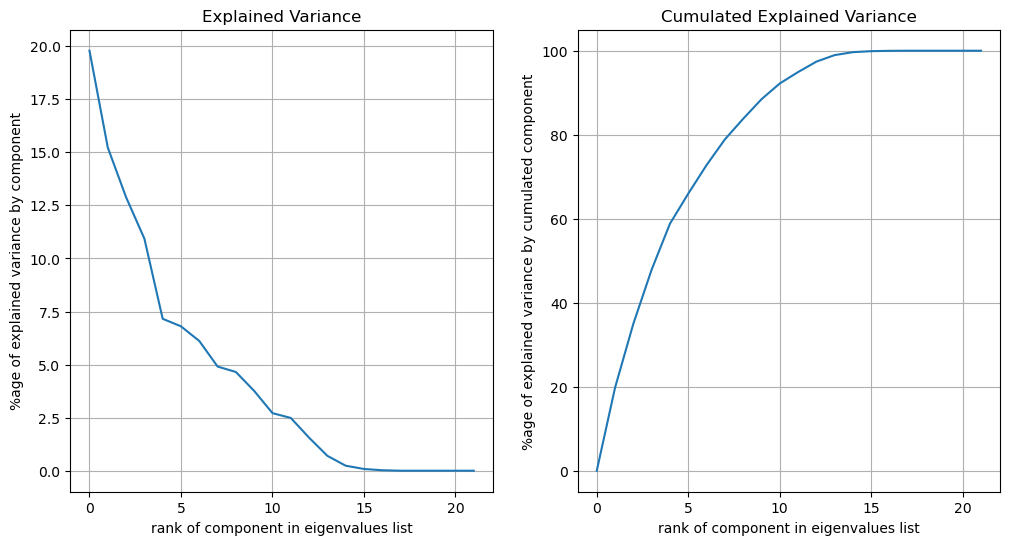

In [216]:
explained_variance_ratio = pca.explained_variance_ratio_
cumul_explained_variance_ratio = np.array([ np.sum(explained_variance_ratio[:i]) for i in range(len(explained_variance_ratio)) ])

c3 = cumul_explained_variance_ratio[3]

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(explained_variance_ratio*100)
ax[0].set_title('Explained Variance')
ax[0].set_xlabel('rank of component in eigenvalues list')
ax[0].set_ylabel("%age of explained variance by component")
ax[0].grid(True)

ax[1].plot(cumul_explained_variance_ratio*100)
ax[1].set_title('Cumulated Explained Variance')
ax[1].set_xlabel('rank of component in eigenvalues list')
ax[1].set_ylabel("%age of explained variance by cumulated component")
ax[1].grid(True)

### Some PCA

In [217]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [218]:
X_pca.shape

(13708, 3)

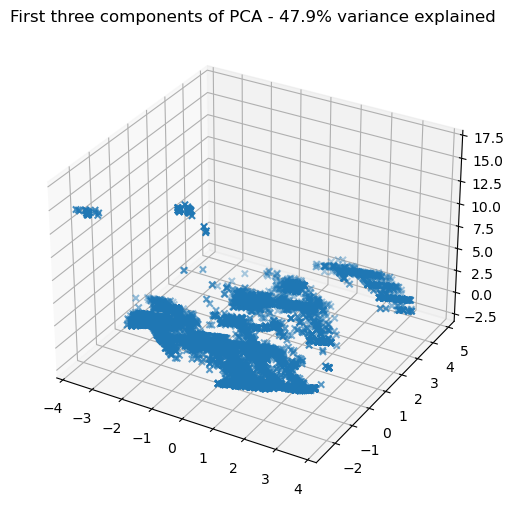

In [219]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(projection='3d')

ax.scatter( X_pca[:,0], X_pca[:,1], X_pca[:,2], marker='x' )
ax.set_title(f'First three components of PCA - {c3*100:.1f}% variance explained')
ax.grid(True)

### DBSCAN

In [220]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=.5, min_samples=10).fit(X_pca)
labels = db.labels_
unique_labels = set(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 70


In [221]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [222]:
db

DBSCAN(min_samples=10)

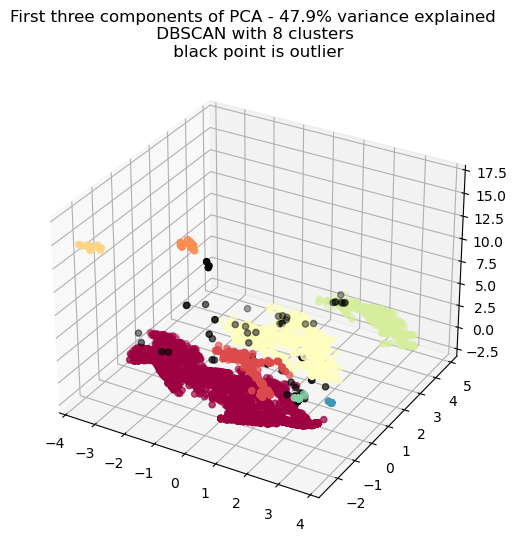

In [223]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
c = [ colors[labels[i]] if labels[i] >= 0 else [0,0,0,1] for i in range(len(labels)) ]

ax.scatter( X_pca[:,0], X_pca[:,1], X_pca[:,2], marker='o', color=c )
ax.set_title(f'First three components of PCA - {c3*100:.1f}% variance explained \n DBSCAN with {n_clusters_} clusters \n black point is outlier')
ax.grid(True)